In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
!pip install mglearn
import mglearn #NO ESTA EN COLAB. INSTALAR CON PIP
%matplotlib inline

     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=e390d58741bcdb17aa78d2fb9105ffb6bd1b321726cb5a8d9a9702c8b362c495
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Generate synthetic data
X, _ = make_blobs(random_state=1)
# Build clustering model
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(X.shape)

(100, 2)


In [3]:
print("Cluster memberships: {}".format(kmeans.labels_))
print("kmeans.labels_.shape:", kmeans.labels_.shape)
print("X.shape", X.shape)
print("kmeans.cluster_centers_: ", kmeans.cluster_centers_)

Cluster memberships: [3 0 4 4 2 2 2 0 1 3 0 4 5 1 5 2 2 3 4 4 2 4 2 3 0 5 2 3 3 5 1 3 5 3 4 2 4
 4 0 2 2 0 3 4 4 2 1 3 1 3 4 5 2 2 1 2 4 4 1 3 4 2 2 0 4 2 1 2 3 4 4 0 2 1
 1 0 2 2 3 4 1 4 4 2 3 3 1 3 4 1 2 3 1 4 4 2 5 1 2 3]
kmeans.labels_.shape: (100,)
X.shape (100, 2)
kmeans.cluster_centers_:  [[ -9.72813615  -4.9983282 ]
 [ -1.63933544   5.29379975]
 [ -6.5461862   -7.79911535]
 [ -1.33824945   3.58202335]
 [-10.16980853  -3.43249573]
 [ -6.71487118  -9.55885468]]


In [5]:
nassig=kmeans.predict(X)
print(nassig)
print(nassig.shape)
print(X.shape)
#print(X)

[1 0 3 3 4 2 2 0 5 1 0 3 4 5 4 2 2 1 3 3 2 3 2 1 0 4 2 1 1 4 5 1 4 1 0 2 0
 3 0 2 2 0 1 3 0 2 5 1 5 1 0 4 2 2 5 2 3 3 5 1 3 2 2 0 3 2 5 2 1 0 3 0 2 5
 5 0 2 2 1 3 5 3 3 2 1 1 5 1 3 5 2 1 5 3 0 2 4 5 2 1]
(100,)
(100, 2)


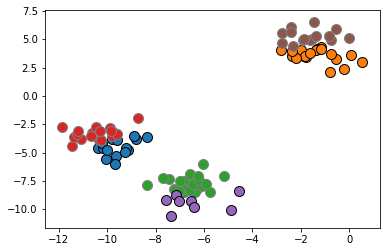

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

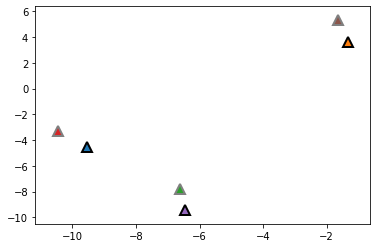

In [7]:
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4, 5], markers='^', markeredgewidth=2)

In [12]:
# Aglomerative clustering:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
print("Assignment", assignment)
print("X.shape", X.shape)

Assignment [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]
X.shape (100, 2)


Text(0, 0.5, 'Feature 1')

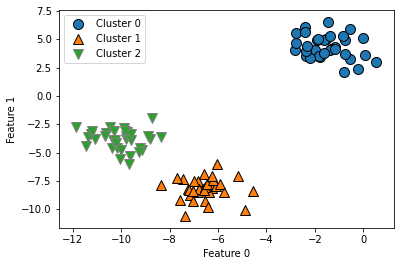

In [13]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Cluster distance')

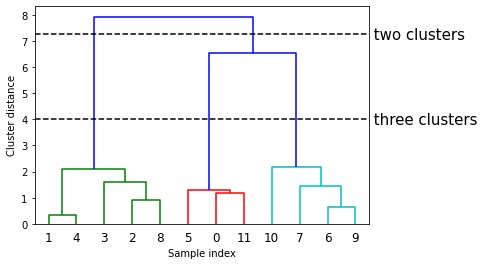

In [14]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [16]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


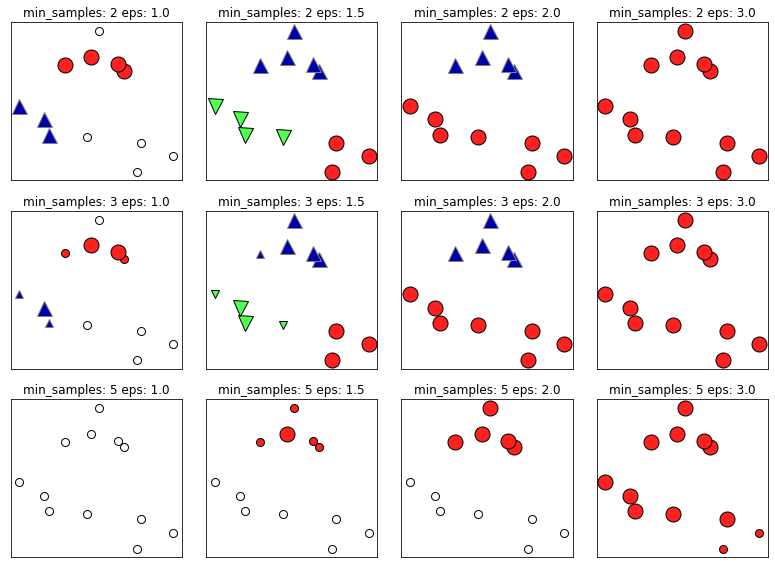

In [17]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

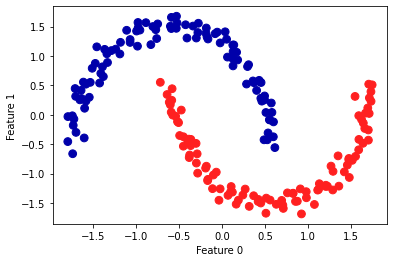

In [19]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")